## Fall 2021 Data Science Intern Challenge Question 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We extract data from the csv file below.

In [14]:
df_original = pd.read_csv("C:\\Users\\\Trevor\\Downloads\\Copy of 2021 Data Science Intern Challenge Data Set - Sheet1.csv")
df = df_original[df_original['order_id'].notna()] #remove rows with order_id being Nan
df.describe()['order_amount']

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From above description, we can see the number 3145.13 being the mean of the order_amount. Let's take a closer look of the data `'order_amount'` by grouping all the order_amount by each `'user_id'`.

<AxesSubplot:ylabel='Frequency'>

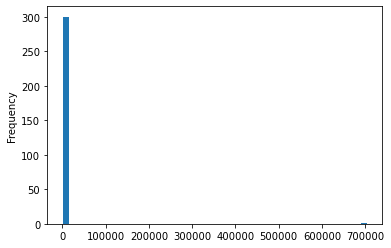

In [18]:
user = df.groupby(['user_id']).mean()
user = user.iloc[:,2:]
(user['order_amount']).plot.hist(bins = 50)

### (a)
From above historgram, we can see that our `'order_amount'` data is extremely inconsistant. We can see that there is clearly an outlier at 700k. 

In [26]:
user.sort_values(by = 'order_amount', ascending=False)

,order_amount,total_items
user_id,,
607,704000.000000,2000.000000
878,14266.909091,2.181818
766,8007.600000,2.300000
834,6019.000000,2.111111
915,5785.142857,2.071429
...,...,...
892,227.307692,1.538462
899,226.666667,1.666667
827,226.500000,1.500000


In [28]:
df[df['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


We can see that this user purchased a consistant amount throughout the month. Therefore, the data was not wrong. 
However, in comparasion of the other user's purchase, we need to remove all data where user_id = 607. After removing it, we have the following changes.

784.945855733842

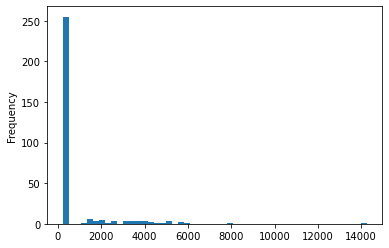

In [29]:
user = user[user['order_amount'] < 700000]
user_amount = user['order_amount']
user_amount.plot.hist(bins = 50)

We still see some large amount of purchase among the majority users. To select the data which best represents the population,
we decide to choose data which the user's average order_amount is less than 1000.

<AxesSubplot:ylabel='Frequency'>

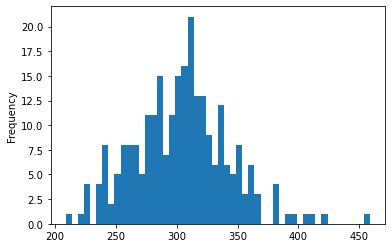

In [38]:
user = user[user['order_amount'] < 1000]
user_amount = user['order_amount']
user_amount.plot.hist(bins = 50)

We can see that our data now is approximately normal. Now, we can safely compute the AOV by calculating the mean of the above data

In [42]:
newdf = pd.merge(df, user, on=["user_id"])
newdf.describe()["order_amount_x"]['mean']

303.6856669820246

Now, we have our new AOV being approximately 303.7 which better represents the whole group then the value before.